# Шестая лабораторная работа
Андрей Алексеевич, группа 20201

In [278]:
import thinkdsp as td
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import linregress
from scipy.fftpack import dct

## Задание 1.
Анализировать временные сложности функций `analyze1` и `analyze2`. Также анализировать функции `dct_iv` и `scipy.fftpack.dct`

In [251]:
def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(td.PI2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

In [252]:
def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(td.PI2 * args)
    amps = M.dot(ys) / 2
    return amps

In [253]:
ug_signal = td.UncorrelatedGaussianNoise()
ug = ug_signal.make_wave(duration=1, framerate=10000)

Функция для подсчёта времени работы

In [254]:
def run_speed_test(ns, func):
    results = []
    for N in ns:
        print(N)
        ts = (0.5 + np.arange(N)) / N
        freqs = (0.5 + np.arange(N)) / 2
        ys = ug.ys[:N]
        result = %timeit -r1 -o func(ys, freqs, ts)
        results.append(result)
        
    bests = [result.best for result in results]
    return bests

Функция для вывода графика зависимости времени выполнения от количества параметров, в логарифмическом масштабе. Она также вычисляет наклон кривой.

In [255]:
def plot_bests(ns, bests):    
    plt.plot(ns, bests)
    td.decorate(xscale='log', yscale='log')
    
    x = np.log(ns)
    y = np.log(bests)
    t = linregress(x, y)
    slope = t[0]

    return slope

In [256]:
ns = 2 ** np.arange(4, 14)
ns

array([  16,   32,   64,  128,  256,  512, 1024, 2048, 4096, 8192],
      dtype=int32)

In [257]:
bests1 = run_speed_test(ns, analyze1)

16
124 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
32
763 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
64
2.53 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
128
5.34 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
256
13.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
512
26.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
1024
72.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
254 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4096
1.14 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8192
4.63 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


1.551146114962935

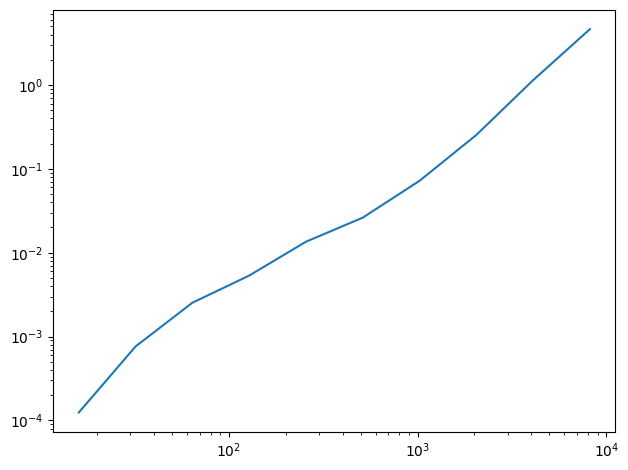

In [258]:
plot_bests(ns, bests1)

In [259]:
bests2 = run_speed_test(ns, analyze2)

16
6.61 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
32
11.7 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
64
30.8 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
128
203 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
256
481 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
512
2.65 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
9.99 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
2048
40.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
162 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
8192
622 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


1.9157111362307377

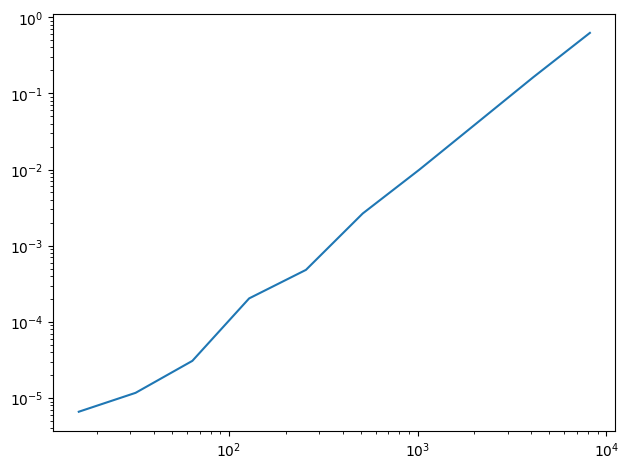

In [260]:
plot_bests(ns, bests2)

In [261]:
def dct_iv(ys):
    N = len(ys)
    ts = (0.5 + np.arange(N)) / N
    fs = (0.5 + np.arange(N)) / 2
    args = np.outer(ts, fs)
    M = np.cos(td.PI2 * args)
    amps = np.dot(M, ys) / 2
    return amps

In [262]:
def dct_iv_wrapper(ys, fs, ts):
    return dct_iv(ys)

def scipy_dct(ys, fs, ts):
    return dct(ys)

In [263]:
bests3 = run_speed_test(ns, dct_iv_wrapper)

16
11.1 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
32
16 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
64
35 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
128
192 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
256
529 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
512
2.51 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
10 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
2048
37.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
155 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
8192
615 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


1.8438816668824545

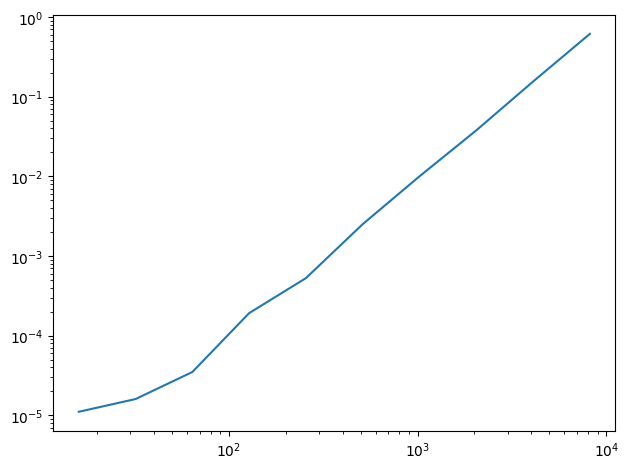

In [264]:
plot_bests(ns, bests3)

In [265]:
bests4 = run_speed_test(ns, dct_wrapper)

16
2.55 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
32
2.66 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
64
2.75 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
128
2.85 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
256
3.16 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
512
3.92 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
1024
5.24 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
2048
8.47 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
4096
18.9 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
8192
41.2 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)


0.40579560891391203

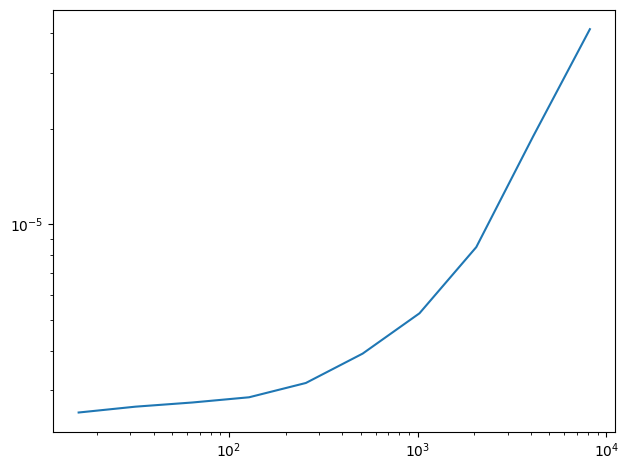

In [266]:
plot_bests(ns, bests4)

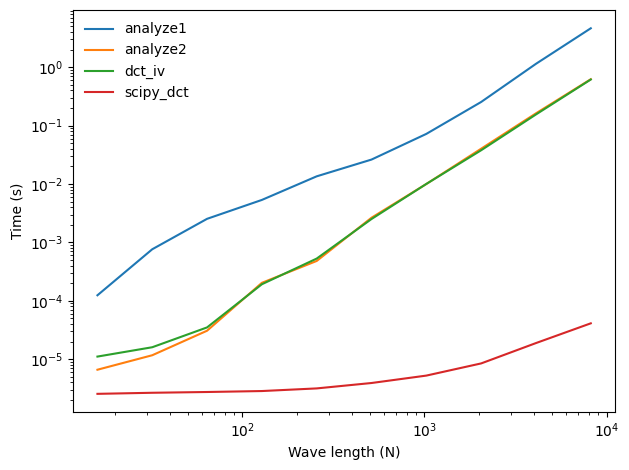

In [267]:
plt.plot(ns, bests1, label='analyze1')
plt.plot(ns, bests2, label='analyze2')
plt.plot(ns, bests3, label='dct_iv')
plt.plot(ns, bests4, label='scipy_dct')
td.decorate(xlabel='Wave length (N)', ylabel='Time (s)', xscale='log', yscale='log')

Временная сложность `analyze1` ближе к $O(n^2)$, чем к $O(n^3)$

Для алгоритмов `analyze2` и `dct_iv` кривые удовлетворяют предположению об их сложности в $O(n^2)$

Сложность алгоритма `scipy_dct` не выражается в виде $O(n^k)$, но алгоритм выполняется гораздо быстрее других

## Задание 2.
Реализовать алгоритм ДКП при сжатии.

In [279]:
wave = td.read_wave('wavs/100475__iluppai__saxophone-weep.wav')
wave.make_audio()

In [280]:
segment = wave.segment(start=4, duration=0.5)
segment.normalize()
segment.make_audio()

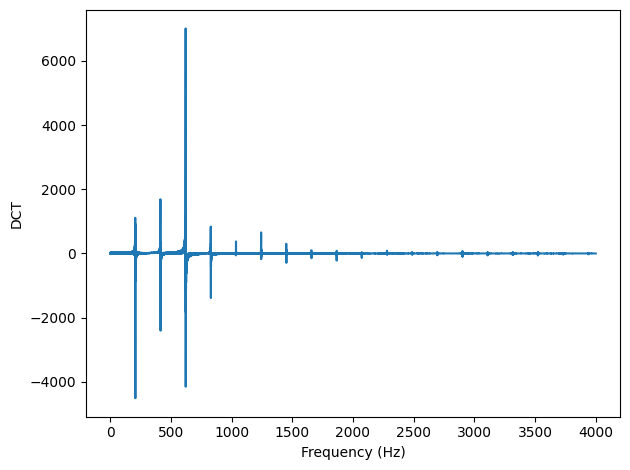

In [270]:
seg_dct = segment.make_dct()
seg_dct.plot(high=4000)
td.decorate(xlabel='Frequency (Hz)', ylabel='DCT')

Функция, принимающая ДКП сигнала. Происходит фильтрация элементов ниже порогового значения.

In [281]:
def compress(dct, threshold):
    cnt = 0
    for i, amp in enumerate(dct.amps):
        if np.abs(amp) < threshold:
            dct.hs[i] = 0
            cnt += 1
    n = len(dct.amps)
    percent = round(cnt / n * 100, 5)
    print(str(percent) + "% removed")

93.07483% removed


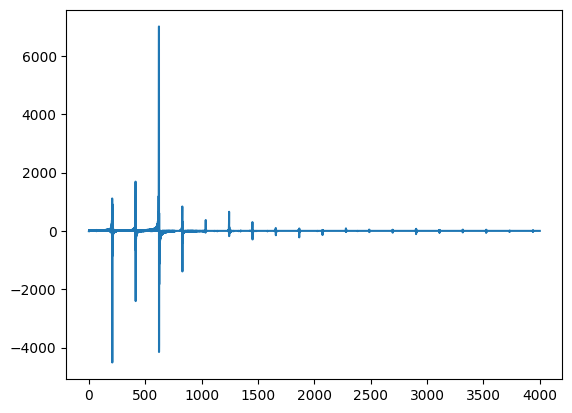

In [282]:
seg_dct = segment.make_dct()
compress(seg_dct, threshold=10)
seg_dct.plot(high=4000)

In [283]:
seg2 = seg_dct.make_wave()
seg2.make_audio()

In [284]:
dct = wave.segment(start=4, duration=0.5).make_dct()
compress(dct, threshold=50)
dct.make_wave().make_audio()

98.92971% removed


Хоть качество звука немного и снизилось, в общем звучание данного отрывка не изменилось.

Функция для создания ДКП-спектрограммы для сжатия. Аналогичен функции `make_spectrogram`.

In [285]:
def make_dct_spectrogram(wave, seg_length):
    window = np.hamming(seg_length)
    i, j = 0, seg_length
    step = seg_length // 2

    spec_map = {}

    while j < len(wave.ys):
        segment = wave.slice(i, j)
        segment.window(window)

        t = (segment.start + segment.end) / 2
        spec_map[t] = segment.make_dct()

        i += step
        j += step

    return td.Spectrogram(spec_map, seg_length)

In [289]:
dcp_sp = make_dct_spectrogram(wave, 1024)
for _, dct in dcp_sp.spec_map.items():
    compress(dct, threshold=0.5)

99.90234% removed
99.41406% removed
99.60938% removed
99.70703% removed
99.80469% removed
99.70703% removed
99.70703% removed
99.60938% removed
99.60938% removed
98.33984% removed
99.12109% removed
99.41406% removed
99.60938% removed
99.41406% removed
99.51172% removed
99.41406% removed
99.41406% removed
99.80469% removed
99.51172% removed
99.51172% removed
99.51172% removed
99.60938% removed
99.51172% removed
99.41406% removed
99.60938% removed
93.84766% removed
89.0625% removed
98.24219% removed
98.82812% removed
98.73047% removed
98.04688% removed
95.3125% removed
89.64844% removed
91.30859% removed
92.57812% removed
92.38281% removed
92.48047% removed
93.75% removed
93.16406% removed
93.55469% removed
93.65234% removed
93.26172% removed
93.45703% removed
93.26172% removed
93.06641% removed
93.16406% removed
93.35938% removed
93.55469% removed
93.26172% removed
93.55469% removed
92.77344% removed
93.06641% removed
93.06641% removed
92.96875% removed
92.67578% removed
92.67578% remov

In [290]:
dcp_sp.make_wave().make_audio()

На фоне записи слышен треск, но мало ощутимый. Запись в основном звучит так же, как и перед сжатием.

## Задание 3.
Изучить блокнот `phase.ipynb`, "прогнать" примеры на ином сегменте звука.

In [243]:
def random_angle(spectrum):
    res = spectrum.copy()
    angles = np.random.uniform(0, td.PI2, len(spectrum))
    res.hs *= np.exp(1j * angles)
    return res

def rotate_angle(spectrum, offset):
    res = spectrum.copy()
    res.hs *= np.exp(1j * offset)
    return res

def zero_angle(spectrum):
    res = spectrum.copy()
    res.hs = res.amps
    return res

def plot_angle(spectrum, thresh=1):
    angles = spectrum.angles
    angles[spectrum.amps < thresh] = np.nan
    plt.plot(spectrum.fs, angles, 'x')
    td.decorate(xlabel='Frequency (Hz)', 
             ylabel='Phase (radian)')

def plot_three(spectrum, thresh=1):
    """Plot amplitude, phase, and waveform.
    
    spectrum: Spectrum object
    thresh: threshold passed to plot_angle
    """
    plt.figure(figsize=(10, 4))
    plt.subplot(1,3,1)
    spectrum.plot()
    plt.subplot(1,3,2)
    plot_angle(spectrum, thresh=thresh)
    plt.subplot(1,3,3)
    wave = spectrum.make_wave()
    wave.unbias()
    wave.normalize()
    wave.segment(duration=0.01).plot()
    display(wave.make_audio())

In [244]:
wave = td.read_wave('wavs/120994__thirsk__120-oboe.wav')
wave.make_audio()

In [245]:
segment = wave.segment(start=5, duration=2)

Визуализация амплитуд, фаз, и волны изначального сигнала.

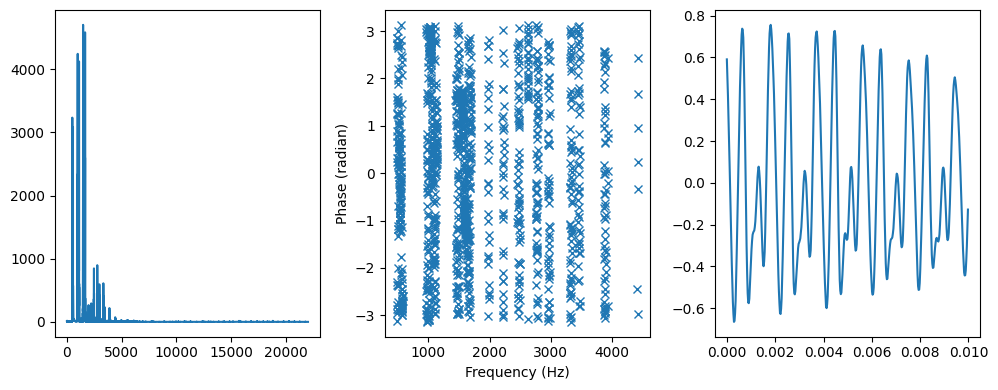

In [246]:
spectrum = segment.make_spectrum()
plot_three(spectrum, thresh=50)

После зануления всех фаз.

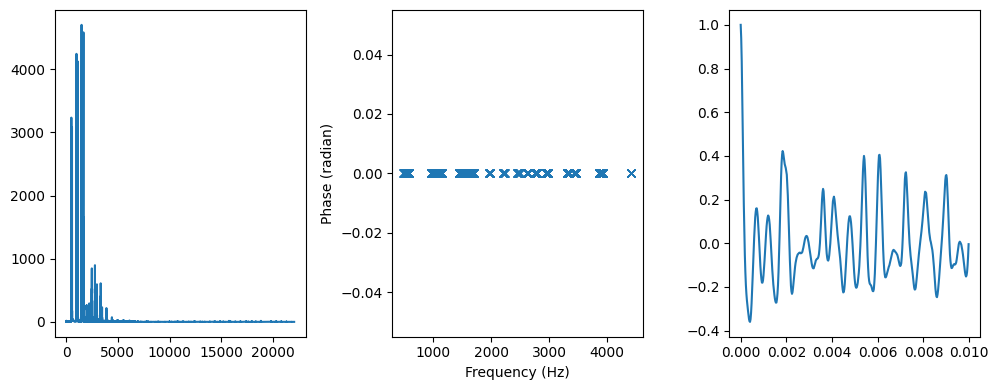

In [247]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2, thresh=50)

После поворота всех фаз на 5 радиан.

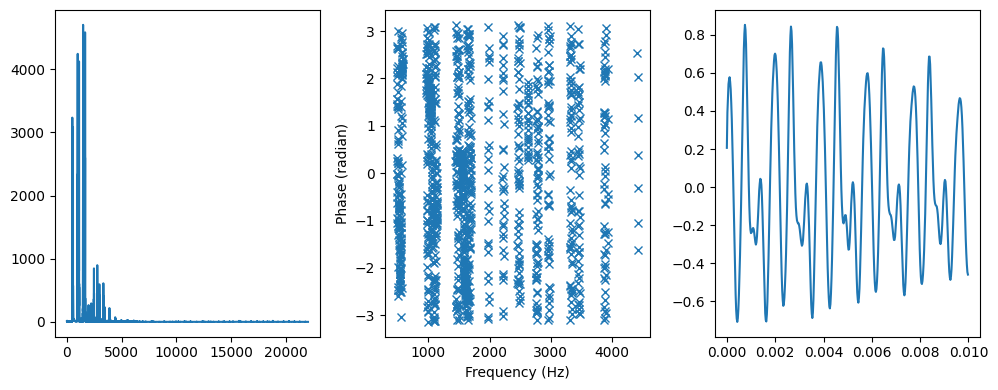

In [248]:
spectrum3 = rotate_angle(spectrum, 5)
plot_three(spectrum3, thresh=50)

После применения случайных фаз.

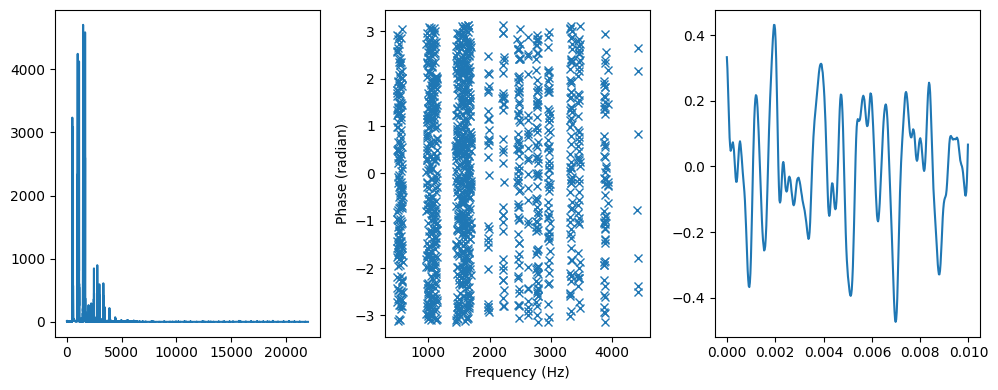

In [249]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4, thresh=50)

В случае с занулением фаз, запись становится гораздо более заглушенной, но под конец амплитуда возрастает.

В случае с поворотом фаз, различий с оригинальной записью почти нет.

В случае с применением случайных фаз, звук получает эффект, будто бы он проигрывается из тоннеля.